In [2]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree


In [3]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [46]:
# Churn value count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
# Average minutes per call.

def minutes_per_call (calls, minutes):
    average_duration=minutes/calls
    return average_duration

In [6]:

df['day call duration']=minutes_per_call(df['total day calls'],df['total day minutes'])
df['eve call duration']=minutes_per_call(df['total eve calls'],df['total eve minutes'])
df['night call duration']=minutes_per_call(df['total night calls'],df['total night minutes'])
df['intl call duration']=minutes_per_call(df['total intl calls'],df['total intl minutes'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
X=df[['international plan','day call duration','eve call duration','night call duration','intl call duration']]
y=df[['churn']]

In [9]:
X

,international plan,day call duration,eve call duration,night call duration,intl call duration
0,no,2.410000,1.993939,2.689011,3.333333
1,no,1.313821,1.898058,2.469903,4.566667
2,no,2.135088,1.101818,1.563462,2.440000
3,yes,4.216901,0.703409,2.212360,0.942857
4,yes,1.475221,1.215574,1.544628,3.366667
...,...,...,...,...,...
3328,no,2.028571,1.710317,3.362651,1.650000
3329,no,4.054386,2.789091,1.555285,2.400000
3330,no,1.658716,4.979310,2.108791,2.350000
3331,yes,2.036190,1.900000,1.016058,0.500000


In [10]:
y

,churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train.isna().sum()

international plan      0
day call duration       0
eve call duration       1
night call duration     0
intl call duration     13
dtype: int64

In [13]:
X_train.dtypes

international plan      object
day call duration      float64
eve call duration      float64
night call duration    float64
intl call duration     float64
dtype: object

In [14]:
X_train_fill_na= X_train.copy()
X_train_fill_na.fillna({'eve call duration':0,'intl call duration':0},inplace=True)
X_train_fill_na.isna().sum()

international plan     0
day call duration      0
eve call duration      0
night call duration    0
intl call duration     0
dtype: int64

In [15]:
categorical=['international plan']
X_train_categorical= X_train_fill_na[categorical].copy()
X_train_categorical

,international plan
2016,no
1362,no
2670,no
2210,no
1846,no
...,...
1095,no
1130,no
1294,no
860,no


In [16]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
ohe.fit(X_train_categorical)
X_train_ohe=pd.DataFrame(ohe.transform(X_train_categorical),index=X_train_categorical.index,)
X_train_ohe

,0,1
2016,1.0,0.0
1362,1.0,0.0
2670,1.0,0.0
2210,1.0,0.0
1846,1.0,0.0
...,...,...
1095,1.0,0.0
1130,1.0,0.0
1294,1.0,0.0
860,1.0,0.0


In [17]:
X_train_noncategorical = X_train_fill_na.select_dtypes(exclude=['object']).copy()
X_train_noncategorical

,day call duration,eve call duration,night call duration,intl call duration
2016,1.715254,3.883582,1.583929,1.840000
1362,1.089344,1.080645,1.325620,4.950000
2670,2.046296,1.279661,2.237500,1.500000
2210,2.535455,2.838806,3.038095,1.671429
1846,1.520513,2.501429,1.378632,2.875000
...,...,...,...,...
1095,2.286667,2.421951,2.593548,2.000000
1130,0.566129,2.031461,4.337931,6.350000
1294,1.152632,2.360360,1.476800,1.840000
860,1.614414,1.347692,2.484783,1.650000


In [18]:
X_train_full=pd.concat([X_train_ohe,X_train_noncategorical],axis=1)
X_train_full

,0,1,day call duration,eve call duration,night call duration,intl call duration
2016,1.0,0.0,1.715254,3.883582,1.583929,1.840000
1362,1.0,0.0,1.089344,1.080645,1.325620,4.950000
2670,1.0,0.0,2.046296,1.279661,2.237500,1.500000
2210,1.0,0.0,2.535455,2.838806,3.038095,1.671429
1846,1.0,0.0,1.520513,2.501429,1.378632,2.875000
...,...,...,...,...,...,...
1095,1.0,0.0,2.286667,2.421951,2.593548,2.000000
1130,1.0,0.0,0.566129,2.031461,4.337931,6.350000
1294,1.0,0.0,1.152632,2.360360,1.476800,1.840000
860,1.0,0.0,1.614414,1.347692,2.484783,1.650000


In [19]:
y_train

,churn
2016,False
1362,False
2670,False
2210,True
1846,False
...,...
1095,False
1130,False
1294,False
860,False


In [20]:
from sklearn import preprocessing
lb=preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_lb=pd.DataFrame(lb.transform(y_train))
y_train_lb


,0
0,0
1,0
2,0
3,1
4,0
...,...
2328,0
2329,0
2330,0
2331,0


In [21]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(fit_intercept=False,C=1e12,solver='liblinear')
model_log= logreg.fit(X_train_full,y_train_lb)
model_log

c:\Users\asaav\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [22]:
y_train_lb_hat = logreg.predict(X_train_full).reshape(2333,1)

train_residuals = np.abs(y_train_lb - y_train_lb_hat)
train_residuals.value_counts()






0    2011
1     322
dtype: int64

In [23]:
train_residuals.value_counts(normalize=True)

0    0.86198
1    0.13802
dtype: float64

In [35]:
accuracy_score(y_train_lb,y_train_lb_hat)

0.8619802828975568

In [24]:
# Test data
X_test_fill_na= X_test.copy()
X_test_fill_na.fillna({'eve call duration':0,'intl call duration':0,'day call duration':0},inplace=True)
X_test_fill_na.isna().sum()

international plan     0
day call duration      0
eve call duration      0
night call duration    0
intl call duration     0
dtype: int64

In [25]:
categorical=['international plan']
X_test_categorical= X_test_fill_na[categorical].copy()
X_test_categorical

,international plan
438,no
2674,no
1345,no
1957,no
2148,no
...,...
3080,no
2548,no
2916,no
2655,no


In [26]:


X_test_ohe=pd.DataFrame(ohe.transform(X_test_categorical),index=X_test_categorical.index,)
X_test_ohe

,0,1
438,1.0,0.0
2674,1.0,0.0
1345,1.0,0.0
1957,1.0,0.0
2148,1.0,0.0
...,...,...
3080,1.0,0.0
2548,1.0,0.0
2916,1.0,0.0
2655,1.0,0.0


In [27]:
X_test_noncategorical = X_test_fill_na.select_dtypes(exclude=['object']).copy()
X_test_noncategorical

,day call duration,eve call duration,night call duration,intl call duration
438,1.666667,3.118868,1.539837,4.500000
2674,0.932479,1.753226,1.336170,2.133333
1345,0.000000,1.227692,1.898864,6.800000
1957,2.693671,2.242857,1.382301,5.100000
2148,1.411765,3.078082,2.502198,1.428571
...,...,...,...,...
3080,1.327451,1.943443,1.300000,4.375000
2548,1.367857,2.393636,1.588235,1.700000
2916,1.305747,1.618367,2.157471,1.750000
2655,3.002740,2.569231,1.356303,2.000000


In [28]:
X_test_full=pd.concat([X_test_ohe,X_test_noncategorical],axis=1)
X_test_full

,0,1,day call duration,eve call duration,night call duration,intl call duration
438,1.0,0.0,1.666667,3.118868,1.539837,4.500000
2674,1.0,0.0,0.932479,1.753226,1.336170,2.133333
1345,1.0,0.0,0.000000,1.227692,1.898864,6.800000
1957,1.0,0.0,2.693671,2.242857,1.382301,5.100000
2148,1.0,0.0,1.411765,3.078082,2.502198,1.428571
...,...,...,...,...,...,...
3080,1.0,0.0,1.327451,1.943443,1.300000,4.375000
2548,1.0,0.0,1.367857,2.393636,1.588235,1.700000
2916,1.0,0.0,1.305747,1.618367,2.157471,1.750000
2655,1.0,0.0,3.002740,2.569231,1.356303,2.000000


In [29]:
y_test

,churn
438,False
2674,False
1345,True
1957,False
2148,False
...,...
3080,False
2548,False
2916,False
2655,False


In [30]:
y_test_lb=pd.DataFrame(lb.transform(y_test))
y_test_lb

,0
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [31]:
y_test_lb_hat = model_log.predict(X_test_full).reshape(1000,1)

test_residuals = np.abs(y_test_lb - y_test_lb_hat)
test_residuals.value_counts()

0    862
1    138
dtype: int64

In [32]:
test_residuals.value_counts(normalize=True)

0    0.862
1    0.138
dtype: float64

In [33]:
accuracy_score(y_test_lb,y_test_lb_hat)

0.862

In [41]:
# Decision Trees
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_full,y_train_lb)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_train_lb_hat_dt=clf.predict(X_train_full)

In [43]:
accuracy_score(y_train_lb,y_train_lb_hat_dt)

1.0

In [44]:
# Decision Trees with Test
y_test_lb_hat_dt=clf.predict(X_test_full)

In [45]:
accuracy_score(y_test_lb_hat_dt,y_test_lb)

0.783

In [47]:
# Addressing class imbalance under logisic reg
logreg= LogisticRegression(fit_intercept=False,C=1e12,class_weight='balanced' ,solver='liblinear')
model_log_bal= logreg.fit(X_train_full,y_train_lb)
model_log_bal


c:\Users\asaav\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1000000000000.0, class_weight='balanced',
                   fit_intercept=False, solver='liblinear')

In [48]:
y_train_lb_hat_bal = model_log_bal.predict(X_train_full).reshape(2333,1)

train_residuals_bal = np.abs(y_train_lb - y_train_lb_hat_bal)
train_residuals_bal.value_counts()


0    1758
1     575
dtype: int64

In [49]:
train_residuals_bal.value_counts(normalize=True)

0    0.753536
1    0.246464
dtype: float64

In [50]:
accuracy_score(y_train_lb,y_train_lb_hat_bal)

0.7535362194599229

In [51]:
# Addressing class imbalance test
y_test_lb_hat_bal = model_log_bal.predict(X_test_full).reshape(1000,1)

In [52]:
accuracy_score(y_test_lb,y_test_lb_hat_bal)

0.738

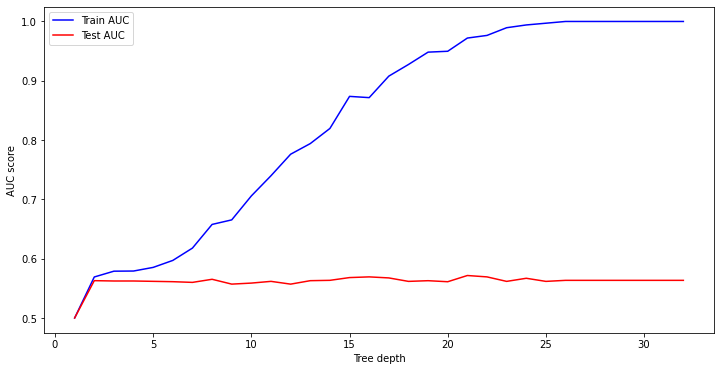

In [53]:
# Tuning the decision trees
from sklearn.metrics import roc_curve,auc

max_depths= list(range(1,33))
train_results_roc=[]
test_results_roc=[]
for max_depth in max_depths:
    dt= DecisionTreeClassifier(criterion='entropy',max_depth=max_depth,random_state=1)
    dt.fit(X_train_full,y_train_lb)
    train_pred=dt.predict(X_train_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_lb, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_roc.append(roc_auc)
    y_pred = dt.predict(X_test_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_lb, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_roc.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results_roc, 'b', label='Train AUC')
plt.plot(max_depths, test_results_roc, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [54]:
# Decision Tuning with a depth of 1
clf2 = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=1)
clf2.fit(X_train_full,y_train_lb)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

In [55]:
y_train_lb_hat_dt_dp=clf2.predict(X_train_full)

In [56]:
accuracy_score(y_train_lb,y_train_lb_hat_dt_dp)

0.8542648949849978

In [57]:
# Decision Trees with Test with depth
y_test_lb_hat_dt_dp=clf2.predict(X_test_full)

In [58]:
accuracy_score(y_test_lb_hat_dt_dp,y_test_lb)

0.857